# Assignment 4

Niko Fauter (1047241)

Henning Klatt (1079429)

### 1. Calculating discrete image gradient using the Sobel operator

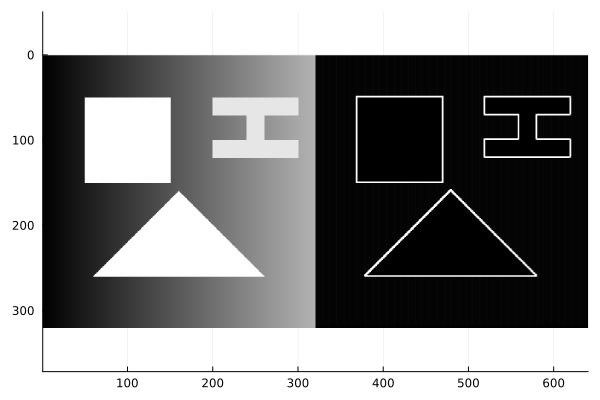

In [10]:
using Images, Plots, FileIO, ImageIO

function getDiscreteImageGradient(img)
    imgArray = channelview(float.(img))
    imgResult = zeros(Gray{Float64}, size(imgArray, 1), size(imgArray, 2));
    # https://en.wikipedia.org/wiki/Sobel_operator#Formulation
    kernel_x = [1 0 -1; 2 0 -2;1 0 -1]
    kernel_y = [1 2 1; 0 0 0;-1 -2 -1]
    for x in eachindex(1:size(imgArray,1) - size(kernel_x,1))
        for y in eachindex(1:size(imgArray,2) - size(kernel_y,2))
            gx = sum(Gray{Float64}.(@view imgArray[x:x+size(kernel_x,1)-1, y:y+size(kernel_y,2)-1]) .* kernel_x)
            gy = sum(Gray{Float64}.(@view imgArray[x:x+size(kernel_x,1)-1, y:y+size(kernel_y,2)-1]) .* kernel_y)
            imgResult[x, y] = sqrt(gx^2 + gy^2)
        end
    end
    return imgResult;
end

shapes=load("shapes1.png");
result = getDiscreteImageGradient(shapes);
Plots.plot(hcat(shapes, result))

### 2. Gaussian filter Gσ with σ = 3.

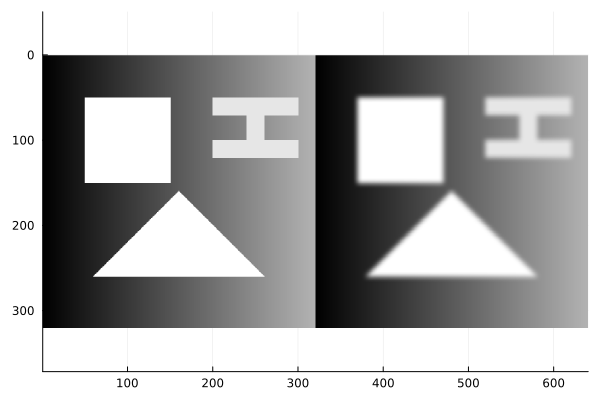

In [16]:
using DSP

g = Kernel.gaussian(3)

#s = imfilter(shapes, conv(g, result));
# Missing convolution with discrete image gradient
s = imfilter(shapes, g);

Plots.plot(hcat(shapes, s))